In [401]:
import numpy as np

In [402]:
import pandas as pd

In [403]:
import matplotlib.pyplot as plt

In [404]:
import seaborn as sns

In [405]:
data = pd.read_csv(r"C:\ANNA DSA\DATA SETS\train.csv")

In [406]:
data_test = pd.read_csv(r"C:\ANNA DSA\DATA SETS\test_Vges7qu.csv")

In [407]:
sample_submission = pd.read_csv(r"C:\ANNA DSA\DATA SETS\sample_submission_V9Inaty.csv")

In [408]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [409]:
data.shape

(550068, 12)

In [410]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [411]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [412]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [413]:
num_data = data.select_dtypes(include = "number")
cat_data = data.select_dtypes(include = "object")

In [414]:
num_cols = num_data.columns.to_list()
cat_cols = cat_data.columns.to_list()

array([[<Axes: title={'center': 'User_ID'}>,
        <Axes: title={'center': 'Occupation'}>,
        <Axes: title={'center': 'Marital_Status'}>],
       [<Axes: title={'center': 'Product_Category_1'}>,
        <Axes: title={'center': 'Product_Category_2'}>,
        <Axes: title={'center': 'Product_Category_3'}>],
       [<Axes: title={'center': 'Purchase'}>, <Axes: >, <Axes: >]],
      dtype=object)

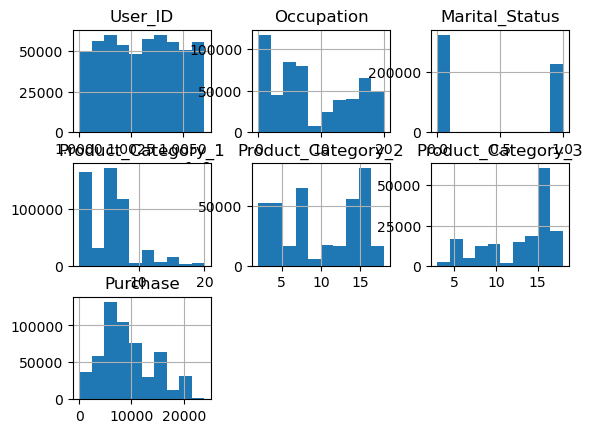

In [415]:
data.hist(num_cols)

In [416]:
print(data[num_cols].skew())

User_ID               0.003066
Occupation            0.400140
Marital_Status        0.367437
Product_Category_1    1.025735
Product_Category_2   -0.162758
Product_Category_3   -0.765446
Purchase              0.600140
dtype: float64


In [417]:
for col in num_data.columns:
    if num_data[col].skew() >= 0 and num_data[col].skew() <= 0.5:
        num_data[col] = num_data[col].fillna(num_data[col].mean())
    else:
        num_data[col] = num_data[col].fillna(num_data[col].median())

In [418]:
data = pd.concat([num_data, cat_data], axis = 1)

In [419]:
data.isna().sum()

User_ID                       0
Occupation                    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
Product_ID                    0
Gender                        0
Age                           0
City_Category                 0
Stay_In_Current_City_Years    0
dtype: int64

In [420]:
data = data.drop('Product_ID', axis = 1)

In [421]:
cat_cols = data.select_dtypes(include = ['object']).columns.tolist()

In [422]:
cat_cols

['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [423]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()

for col in ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']:
    data[col] = Label_Encoder.fit_transform(data[col])

In [424]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
550063    False
550064    False
550065    False
550066    False
550067    False
Length: 550068, dtype: bool

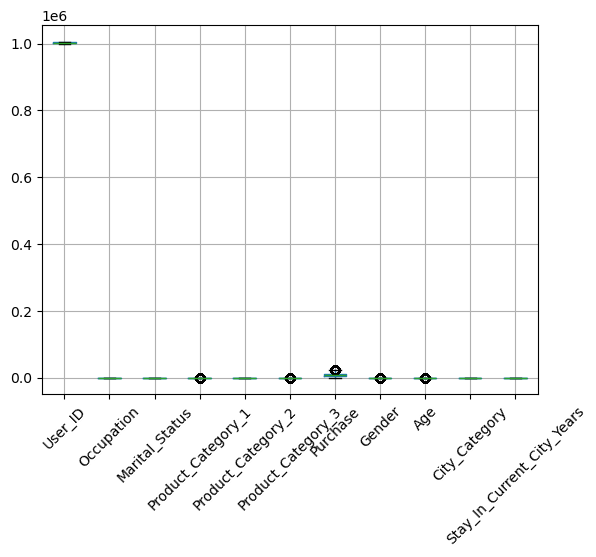

In [425]:
data.boxplot()
plt.xticks(rotation = 45)
plt.show()

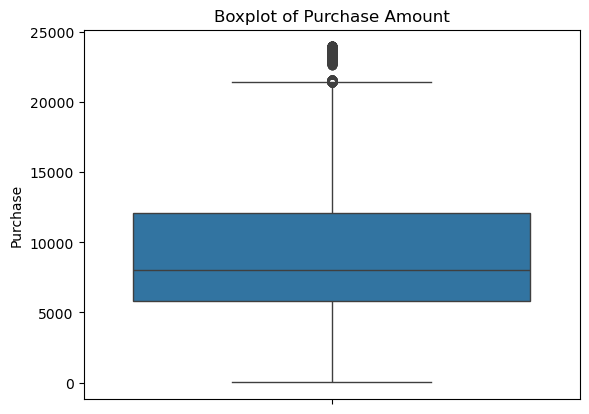

In [426]:
sns.boxplot(data['Purchase'])
plt.title("Boxplot of Purchase Amount")
plt.show()

In [427]:
def remove_outliers(data, column):
    
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
        
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[column] = data[column].clip(upper = upper_bound)
    data[column] = data[column].clip(lower = lower_bound)
        
    return data[column]

In [428]:
for col in data:
    data[col] = remove_outliers(data, col)

In [429]:
data.columns

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Gender', 'Age',
       'City_Category', 'Stay_In_Current_City_Years'],
      dtype='object')

In [430]:
corr_matrix = data.corr()

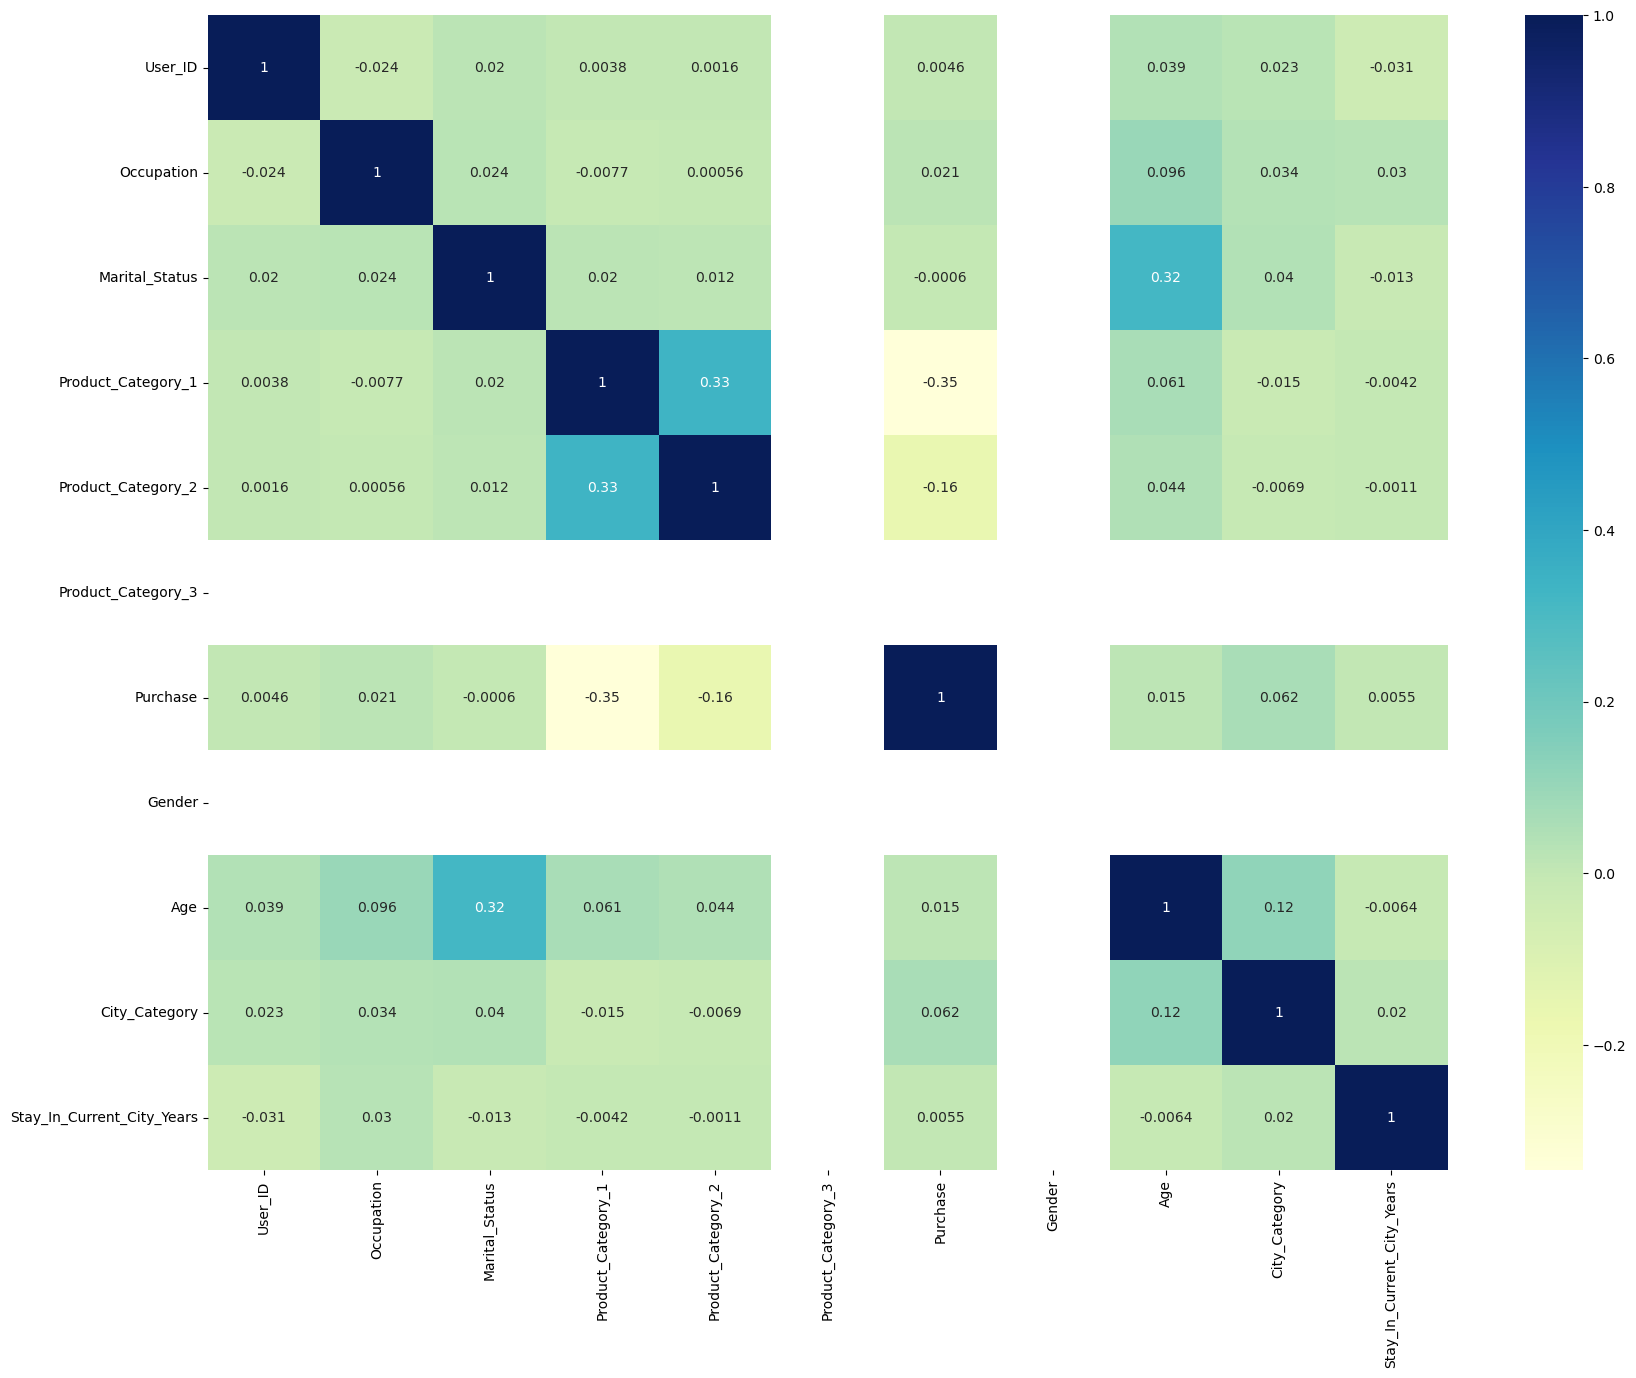

In [431]:
plt.subplots(figsize = (20, 15))
sns.heatmap(corr_matrix, annot = True, cmap = 'YlGnBu')
plt.show()

In [432]:
result = {'Models:' : [],
          'MSE:' : [],
          'RMSE:' : [],
          'R2' : []
        }
result_dt = pd.DataFrame(result)
result_dt

,Models:,MSE:,RMSE:,R2


In [433]:
from sklearn.model_selection import train_test_split

In [434]:
x = data.drop(['User_ID', 'Purchase' ], axis = 1)
y = data['Purchase']

In [435]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [436]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

pred1 = lr.predict(x_test)

In [437]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean_Squared_Error:', mean_squared_error(y_test, pred1))
print('Root Mean Squared Error (RMSE):', mean_squared_error(y_test, pred1, squared=False))
print('R = Squared Value: ', r2_score(y_test, pred1) )

Mean_Squared_Error: 21772537.87562277
Root Mean Squared Error (RMSE): 4666.105214804181
R = Squared Value:  0.12563096199997892


C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [438]:
result_dt.loc[len(result_dt)] = ["Linear Regression", mean_squared_error(y_test, pred1), mean_squared_error(y_test, pred1, squared=False), r2_score(y_test, pred1)]

C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [439]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

lr = LinearRegression()
lr.fit(x_train_poly, y_train)

pred2 = lr.predict(x_test_poly)

In [440]:
print('Mean_Squared_Error:', mean_squared_error(y_test, pred2))
print('Root Mean Squared Error (RMSE):', mean_squared_error(y_test, pred2, squared=False))
print('R = Squared Value: ', r2_score(y_test, pred2) )

Mean_Squared_Error: 19164152.37981808
Root Mean Squared Error (RMSE): 4377.688017643341
R = Squared Value:  0.230381796731721


C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [441]:
result_dt.loc[len(result_dt)] = ["Polynomial Regression", mean_squared_error(y_test, pred2), mean_squared_error(y_test, pred2, squared=False), r2_score(y_test, pred2)]

C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [442]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

pred3 = rf_model.predict(x_test)

In [443]:
print('Mean_Squared_Error:', mean_squared_error(y_test, pred3))
print('Root Mean Squared Error (RMSE):', mean_squared_error(y_test, pred3, squared=False))
print('R = Squared Value: ', r2_score(y_test, pred3) )

Mean_Squared_Error: 9135721.194197107
Root Mean Squared Error (RMSE): 3022.535557143556
R = Squared Value:  0.6331161852771359


C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [444]:
result_dt.loc[len(result_dt)] = ["Random Forest Regressor", mean_squared_error(y_test, pred3), mean_squared_error(y_test, pred3, squared=False), r2_score(y_test, pred3)]

C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [445]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1) 

lasso.fit(x_train, y_train)
pred4 = lasso.predict(x_test)

In [446]:
print('Mean_Squared_Error:', mean_squared_error(y_test, pred4))
print('Root Mean Squared Error (RMSE):', mean_squared_error(y_test, pred4, squared=False))
print('R = Squared Value: ', r2_score(y_test, pred4) )

Mean_Squared_Error: 21772541.95260251
Root Mean Squared Error (RMSE): 4666.105651675979
R = Squared Value:  0.12563079827148438


C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [447]:
result_dt.loc[len(result_dt)] = ["Lasso Regression", mean_squared_error(y_test, pred4),mean_squared_error(y_test, pred4, squared=False), r2_score(y_test, pred4)]

C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [448]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X1 = std_scaler.fit_transform(x)
X1 = pd.DataFrame(X1)

In [449]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y_train, y_test = train_test_split(X1,y,test_size = 0.25, random_state=42)

In [450]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x1_train, y_train)

y_pred1 = lr.predict(x1_test)

In [451]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean_Squared_Error:', mean_squared_error(y_test, y_pred1))
print('R = Squared Value: ', r2_score(y_test, y_pred1) )

Mean_Squared_Error: 21807226.08844462
R = Squared Value:  0.12512013669467126


In [452]:
result_dt

,Models:,MSE:,RMSE:,R2
0,Linear Regression,2.177254e+07,4666.105215,0.125631
1,Polynomial Regression,1.916415e+07,4377.688018,0.230382
2,Random Forest Regressor,9.135721e+06,3022.535557,0.633116
3,Lasso Regression,2.177254e+07,4666.105652,0.125631


In [453]:
##Test data

In [454]:
data_test.head()

,Comb,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004P00128942,1000004,P00128942,M,46-50,7,B,2,0,1,11.0,NaN
1,1000009P00113442,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010P00288442,1000010,P00288442,F,36-45,1,B,4+,0,5,14.0,NaN
3,1000010P00145342,1000010,P00145342,F,36-45,1,B,4+,0,4,9.0,NaN
4,1000011P00053842,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [455]:
data_test = data_test.drop('Comb', axis = 1)

In [456]:
data_test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


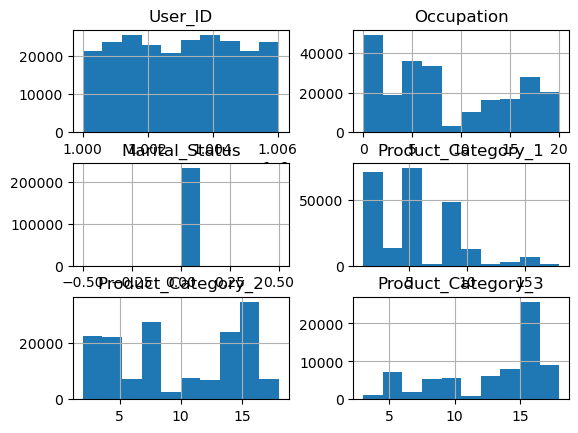

In [457]:
data_test.hist()
plt.show()

In [458]:
data_test.shape

(233599, 11)

In [459]:
data_test.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [460]:
data_test = data_test.drop('Product_ID', axis = 1)

In [461]:
num_data = data_test.select_dtypes(include = "number")
cat_data = data_test.select_dtypes(include = "object")

In [462]:
for col in num_data.columns:
    if num_data[col].skew() >= 0 and num_data[col].skew() <= 0.5:
        num_data[col] = num_data[col].fillna(num_data[col].mean())
    else:
        num_data[col] = num_data[col].fillna(num_data[col].median())

In [475]:
data_test = pd.concat([num_data, cat_data], axis = 1)

In [476]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()

for col in ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']:
    data_test[col] = Label_Encoder.fit_transform(data_test[col])

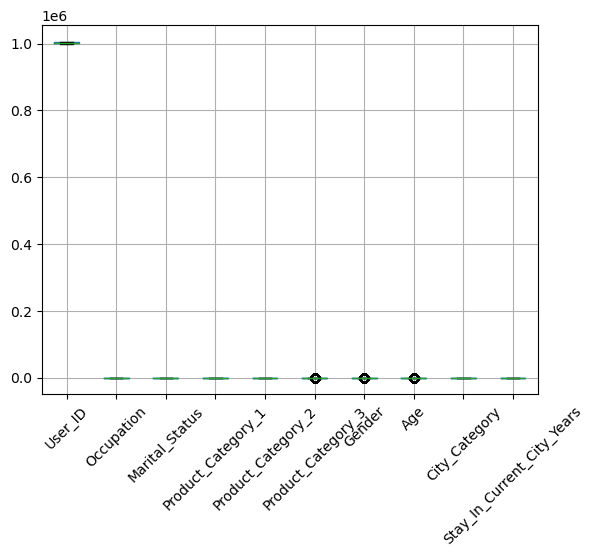

In [477]:
data_test.boxplot()
plt.xticks(rotation = 45)
plt.show()

In [478]:
def remove_outliers(data_test, column):
    
    Q1 = data_test[column].quantile(0.25)
    Q3 = data_test[column].quantile(0.75)
    IQR = Q3 - Q1
        
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data_test[column] = data_test[column].clip(upper = upper_bound)
    data_test[column] = data_test[column].clip(lower = lower_bound)
        
    return data_test[column]

In [479]:
for col in data_test.select_dtypes(include=['int64', 'float64']).columns:
    data_test[col] = remove_outliers(data_test, col)

In [480]:
data_test.columns

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Gender', 'Age',
       'City_Category', 'Stay_In_Current_City_Years'],
      dtype='object')

In [481]:
corr_matrix = data_test.select_dtypes(include=['int64', 'float64']).corr()

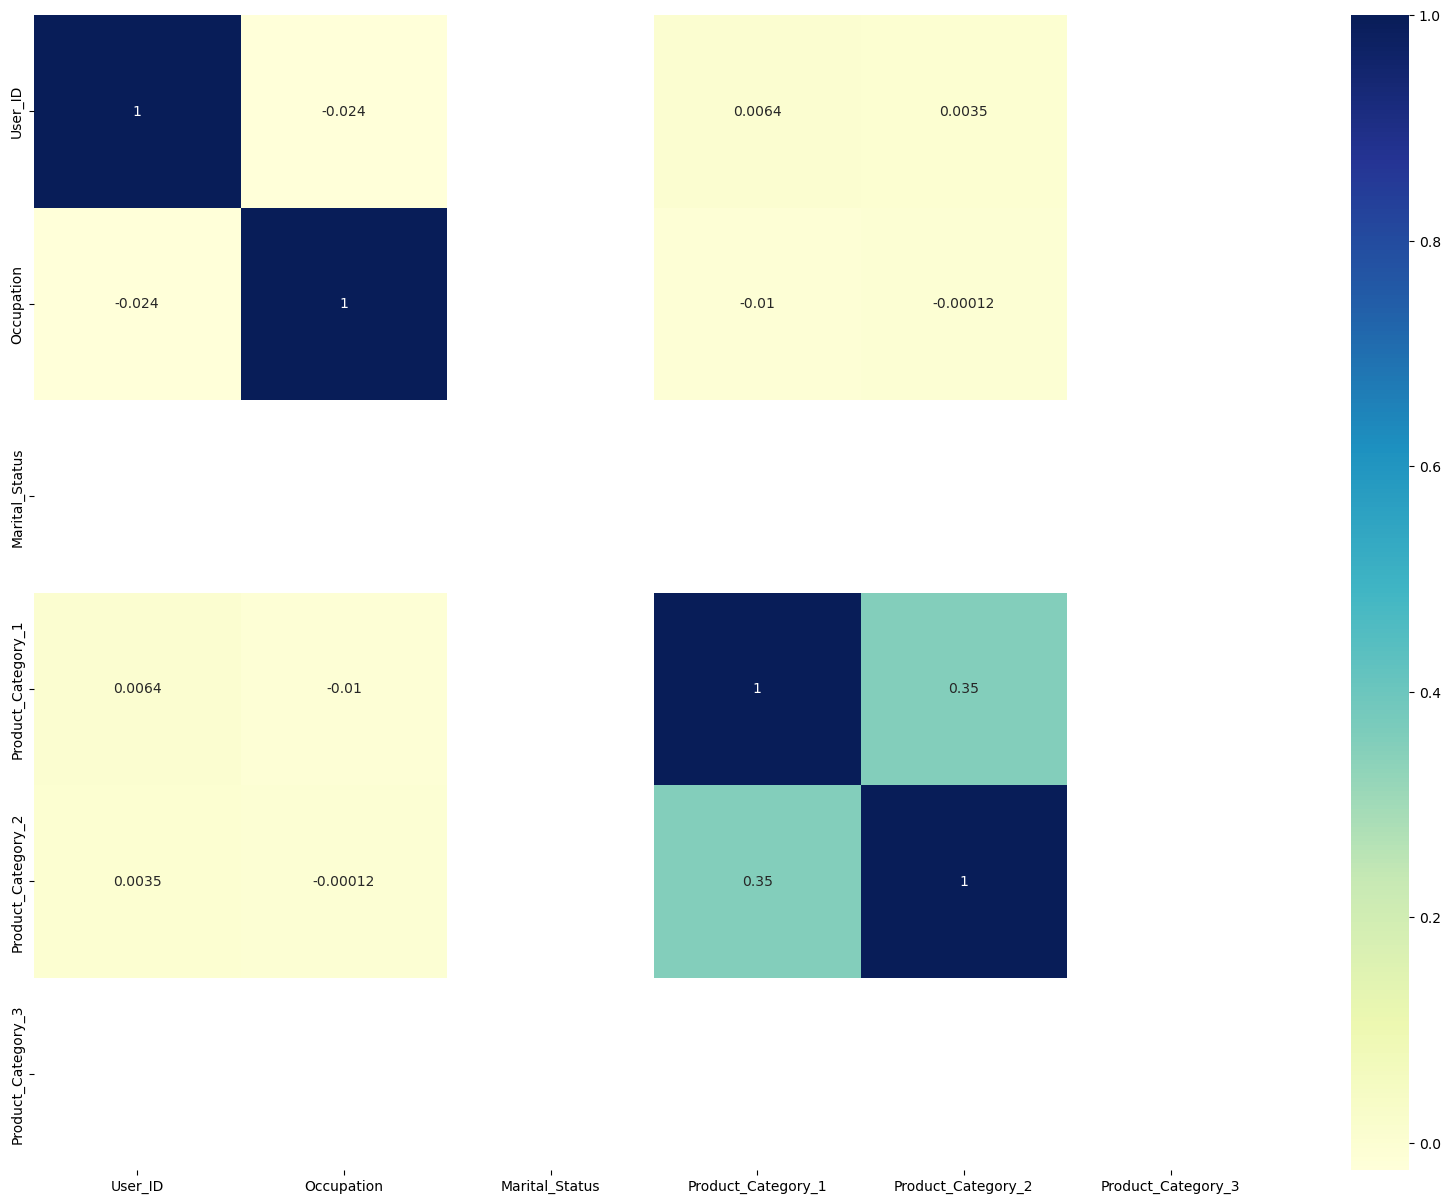

In [482]:
plt.subplots(figsize = (20, 15))
sns.heatmap(corr_matrix, annot = True, cmap = 'YlGnBu')
plt.show()

In [483]:
x_test_final = data_test.drop(['User_ID'], axis=1)

In [484]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
rf_model.fit(x, y)

test_preds = rf_model.predict(x_test_final)


In [485]:
sample_submission = pd.read_csv(r"C:\ANNA DSA\DATA SETS\sample_submission_V9Inaty.csv")
sample_submission['Purchase'] = test_preds
sample_submission.to_csv('final_submission.csv', index=False)
